# [6등] 신용카드 거래 데이터 시각화

https://dacon.io/competitions/official/42473/codeshare/434?page=1&dtype=recent

In [3]:
# 패키지 설치
install.packages("dplyr")
install.packages("data.table")
install.packages("ggplot2")
install.packages("MASS")
install.packages("lattice")
install.packages("corrplot")
install.packages("corrgram")

# 패키지 불러오기
library(dplyr)
library(data.table)
library(ggplot2)
library(MASS)
library(lattice)
library(corrplot)
library(corrgram)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘seriation’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


In [2]:
# 파일 읽어오기
system("gdown --id 11VEsPIimNLpkbfaWi8WEK8779TeSk2_9")
df <- read.csv("train.csv", encoding = "UTF-8")

### 데이터 전처리

- 시간과 날짜 데이터는 사용하지 않으므로 제거

- installments 만 일시불로 인해 NA가 있음 -> 결측치로 계산하면 인식할 수 없기 때문에 NA = 0으로 대입

In [4]:
df$installments[is.na(df$installments)] <- 0
colSums(is.na(df))

store_id         date         time      card_id       amount installments 
           0            0            0            0            0            0 
days_of_week      holyday 
           0            0

> **aggregate()**: 특정 컬럼을 기준으로 통계량을 구해주는 함수

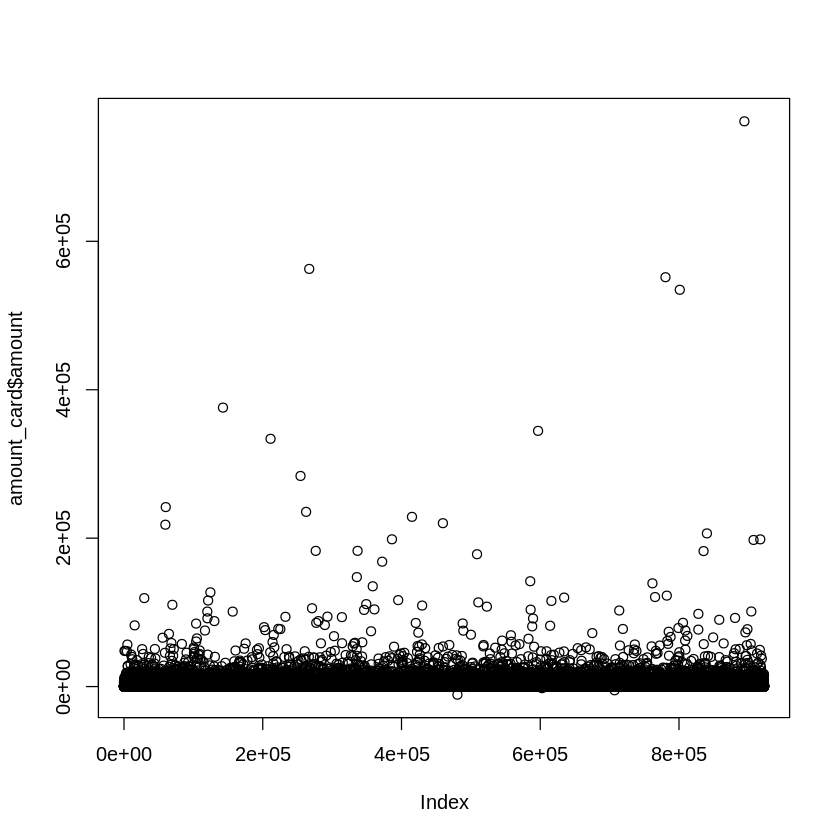

In [5]:
# card_id 기준 amount값의 sum 구하기
amount_card <- aggregate(amount~card_id,df,sum)
plot(amount_card$amount)

>**fivenum()**: 다섯 수치 요약을 구하는 함수 →
최솟값, 제1사분위수, 중앙값, 제3사분위수, 최댓값

In [6]:
fivenum(amount_card$amount) 

[1] -10904     90    208    498 761667

In [7]:
amount_card[amount_card$amount<0,]

,card_id,amount
,<chr>,<int>
331684,5c127f94cd,-118
455055,7e74575056,-330
480617,8589f5980e,-10904
497587,8a3dc45eaa,-625
602577,a7416614f6,-2167
707167,c43fee0edb,-4980


매출액의 합이 음수인 경우 카드 취소 후 다른 카드로 재결제 한 것으로 추정하고 데이터 유지

### 명목형 변수들의 빈도수 측정

In [9]:
# installments 변수의 빈도수 측정
installments_freq <- as.data.frame(sort(table(df$installments),decreasing = T))
colnames(installments_freq) <- c("Installments", "Freq")
installments_freq

Installments,Freq
<fct>,<int>
0,3345936
3,10686
2,3431
5,1220
6,647
10,252
4,209
12,206
24,96


Installments = 0인 경우 즉, 일시불로 결제한 경우가 압도적으로 많음

In [10]:
# 요일 변수의 빈도수 측정
days_freq <- as.data.frame(sort(table(df$days_of_week),decreasing = T))
colnames(days_freq) <- c("Days of Week", "Freq")
days_freq 

Days of Week,Freq
<fct>,<int>
5,533093
4,511031
3,472820
2,471573
1,467276
6,462156
0,444847


토요일, 금요일에 빈도수가 높음, 상대적으로 일요일은 적은 편

In [11]:
# holyday 변수의 빈도수 측정
holyday_freq <- as.data.frame(sort(table(df$holyday),decreasing = T))
colnames(holyday_freq) <- c("Holyday", "Freq")
holyday_freq

Holyday,Freq
<fct>,<int>
0,3213781
1,149015


공휴일에 소비가 다른 날보다 확연히 많은 것으로 확인

### Amount 칼럼 분석

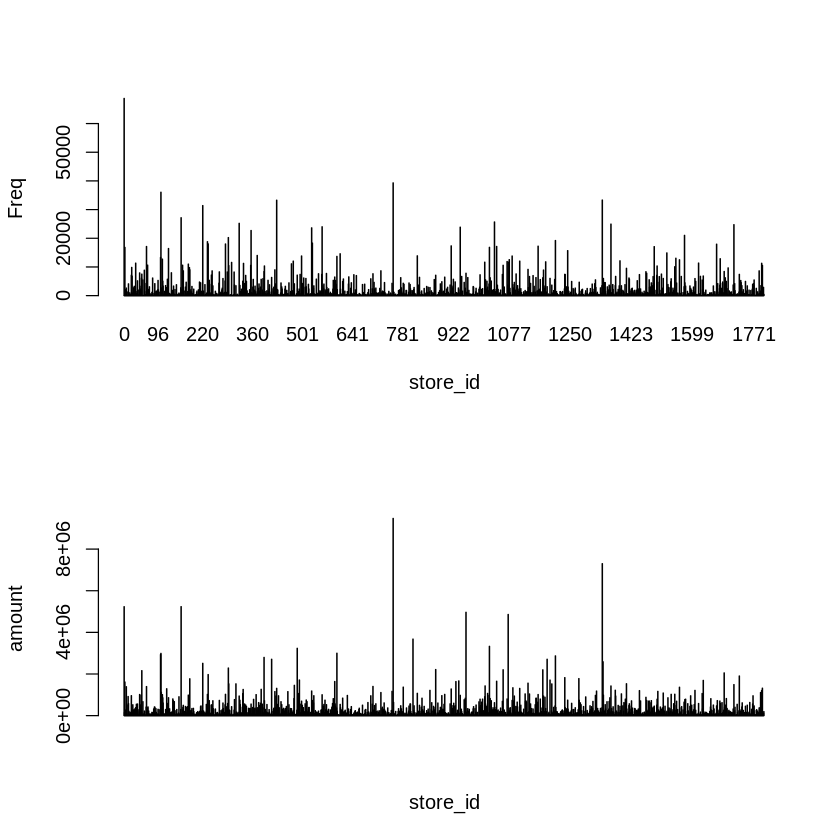

In [12]:
store_total_amount <- aggregate(amount~store_id, df, sum)
par(mfrow=c(2,1))
barplot(table(df$store_id), xlab="store_id", ylab="Freq")
barplot(store_total_amount$amount, xlab="store_id", ylab="amount")

최대빈도와 최대 매출액 상점이 같지 않음

In [13]:
store_comp <- merge(store_total_amount,store_freq, by="store_id")
head(store_comp, 10) 

,store_id,amount,Freq
,<int>,<int>,<int>
1,0,5234611,68773
2,1,147950,40
3,2,1615060,16829
4,3,62781,383
5,4,270312,2082
6,5,184437,124
7,6,1389983,2653
8,7,109510,122
9,8,515535,1153


In [14]:
store_comp_topa <- head(store_comp[order(-store_comp$amount),],10) # 총매출액 순으로 나열
store_comp_topa

,store_id,amount,Freq
,<int>,<int>,<int>
747,753,9474601,39318
1327,1342,7301327,33335
159,161,5236075,27170
1,0,5234611,68773
949,958,4965728,7810
1066,1076,4860885,11700
802,810,3677501,1738
1014,1024,3330293,16847
481,486,3235482,7156


In [15]:
store_comp_topf <- head(store_comp[order(-store_comp$Freq),], 10) # 최빈도순으로 나열
store_comp_topf

,store_id,amount,Freq
,<int>,<int>,<int>
1,0,5234611,68773
747,753,9474601,39318
103,105,2991082,36063
1327,1342,7301327,33335
424,428,1312204,33285
219,221,2513245,31409
159,161,5236075,27170
1028,1038,622402,25694
320,323,942298,25221



   1    2    3 
1551   17  207 

,store_id,amount
1,897.2063,140664.4
2,703.6471,4112564.5
3,919.6087,979504.4


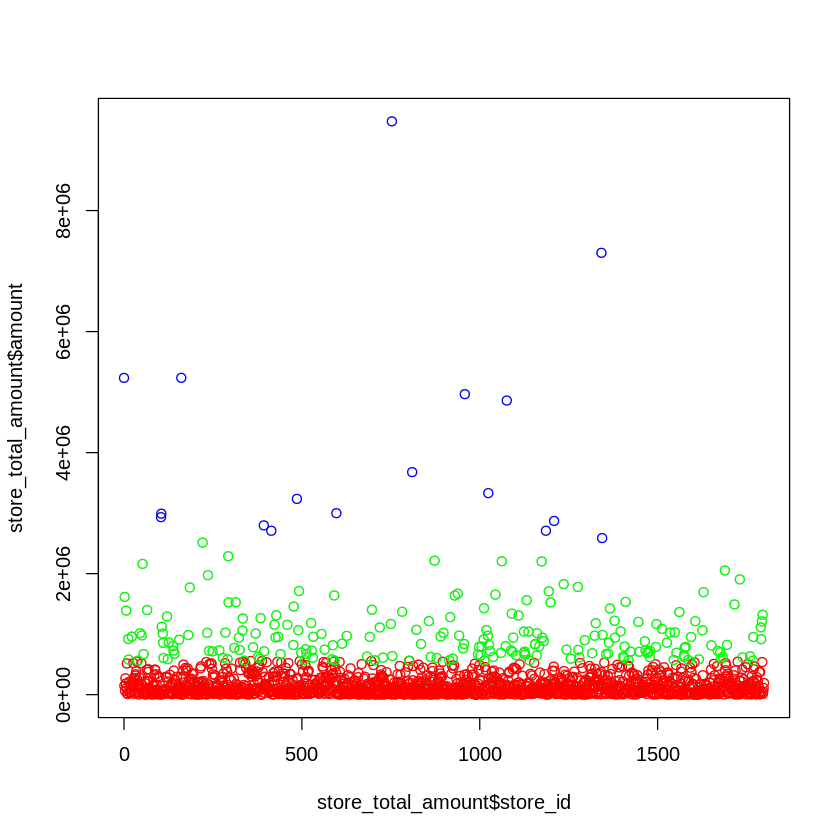

In [17]:
# 각 상점을 총 매출액 기준으로 군집화 (상위그룹, 중위그룹, 하위그룹)

res<- kmeans(store_total_amount,3,iter.max=100)
table(res$cluster)
res$centers
i1 <- which(res$cluster==1)
i2 <- which(res$cluster==2)
i3 <- which(res$cluster==3)

dat_i1 <- store_total_amount[i1,]
dat_i2 <- store_total_amount[i2,]
dat_i3 <- store_total_amount[i3,]

plot(store_total_amount$store_id, store_total_amount$amount, col='grey')
points(dat_i1$store_id, dat_i1$amount, col='red')
points(dat_i2$store_id,dat_i2$amount, col='blue')
points(dat_i3$store_id, dat_i3$amount, col='green')

In [18]:
# 각 군집의 상점 ID를 저장
store1_id <- dat_i1$store_id
store2_id <- dat_i2$store_id
store3_id <- dat_i3$store_id

In [19]:
# 총 매출액 기준 상위, 중위, 하위 군집으로 나눈 데이터를 넣어줌

store1 <- df[df$store_id==store1_id[1],]
for(i in 2:length(store1_id)){
  store1 <-rbind(store1, df[df$store_id==store1_id[i],])
}

store2 <- df[df$store_id==store2_id[1],]  
for(j in 2:length(store2_id)){
    store2 <- rbind(store2, df[df$store_id==store2_id[j],])
}

store3 <- df[df$store_id==store3_id[1],] 
for(k in 2:length(store3_id)){
store3 <- rbind(store3, df[df$store_id==store3_id[k],])
  }

dim(store1)[1]+dim(store2)[1]+dim(store3)[1]

[1] 3362796

### 상관관계

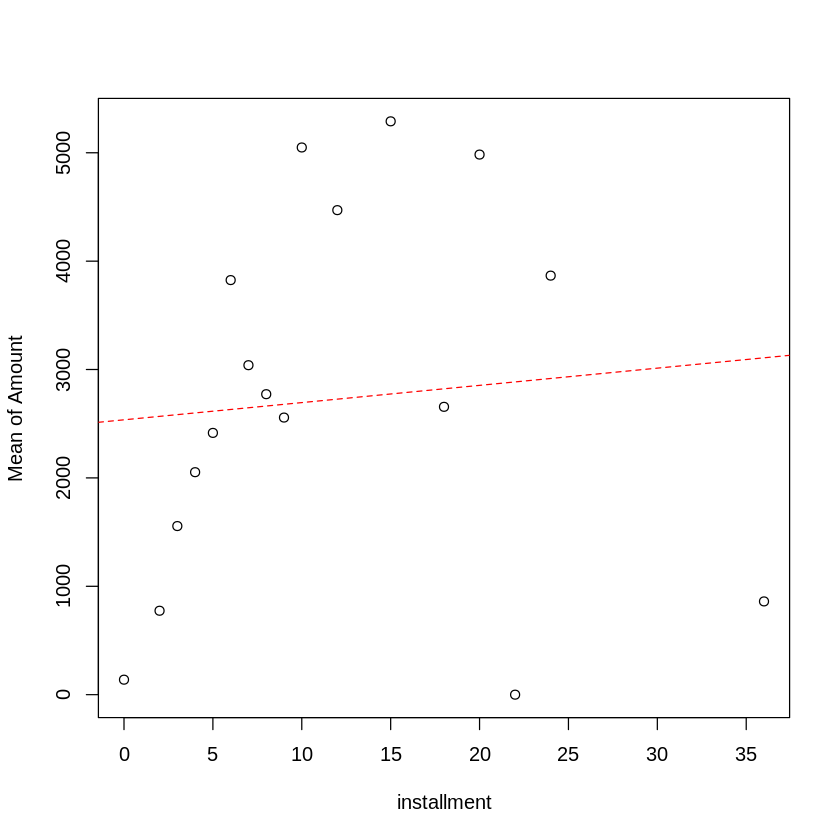

In [20]:
# installment와 amount 사이의 관계
installment_amount <- aggregate(amount~installments, df, mean)
plot(installment_amount$installments, installment_amount$amount, xlab="installment", ylab="Mean of Amount")
abline(lm(installment_amount$amount~installment_amount$installments), col="red", lty="dashed")

할부 개월이 커지면 매출액이 증가하는 추세

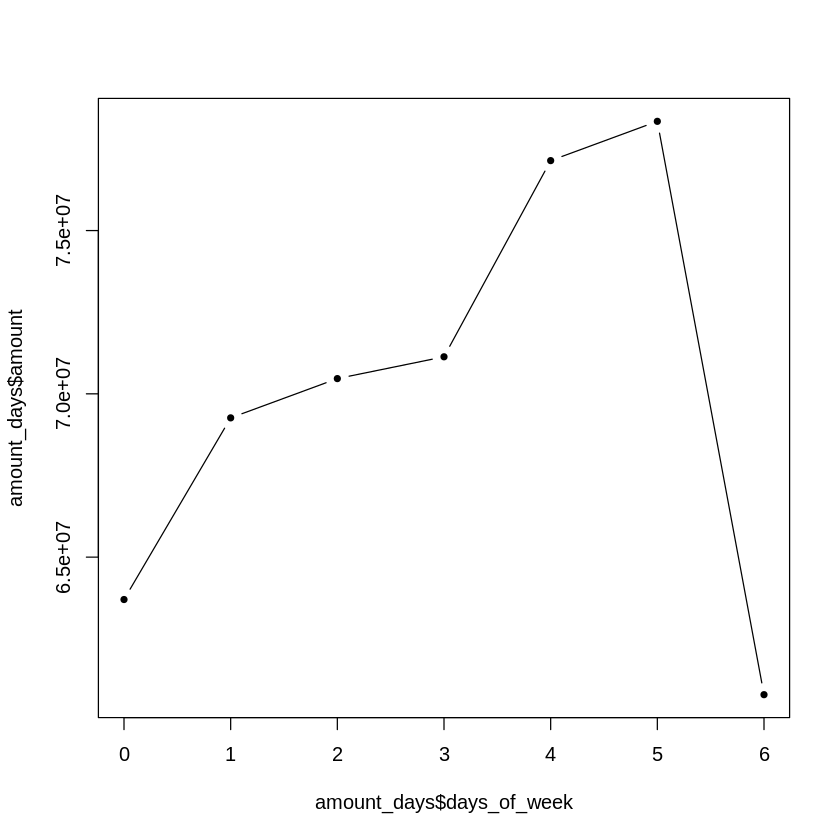

In [21]:
# 요일과 amount 사이의 관계
amount_days <- aggregate(amount~days_of_week,df,sum)
plot(amount_days$days_of_week, amount_days$amount, pch=20, type='b')

일요일에서 토요일로 갈수록 총 매출액이 증가하는 추세

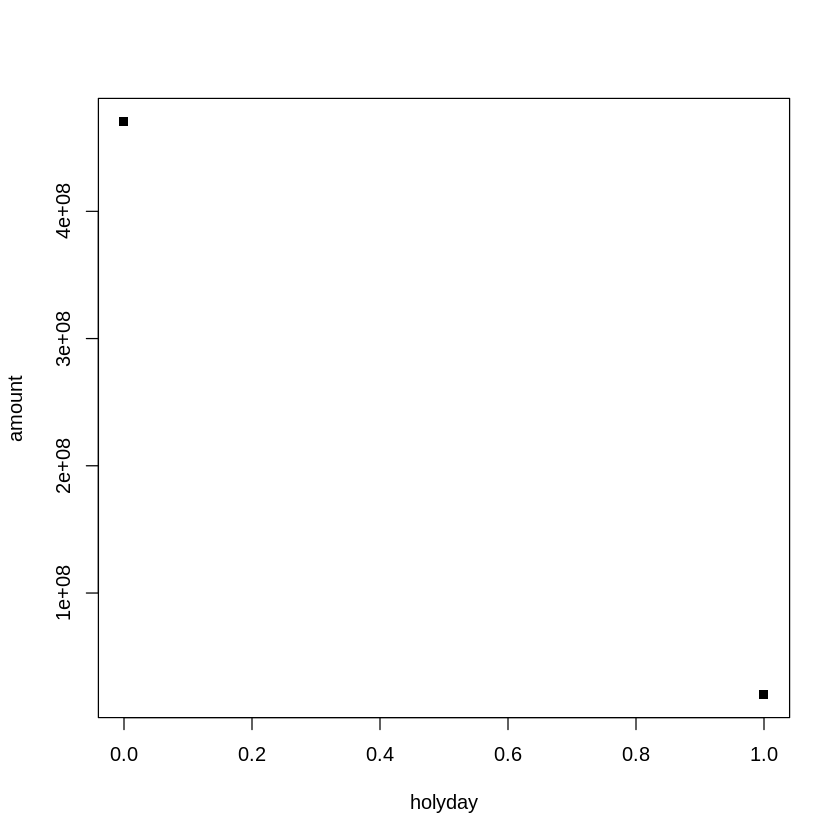

In [22]:
# holyday와 amount 사이의 관계
amount_holy <- aggregate(amount~holyday, df, sum)
plot(amount_holy, pch=15) 

휴일과 아닌 날의 총 매출액 차이가 큼

### 3개 군집간 특성 비교

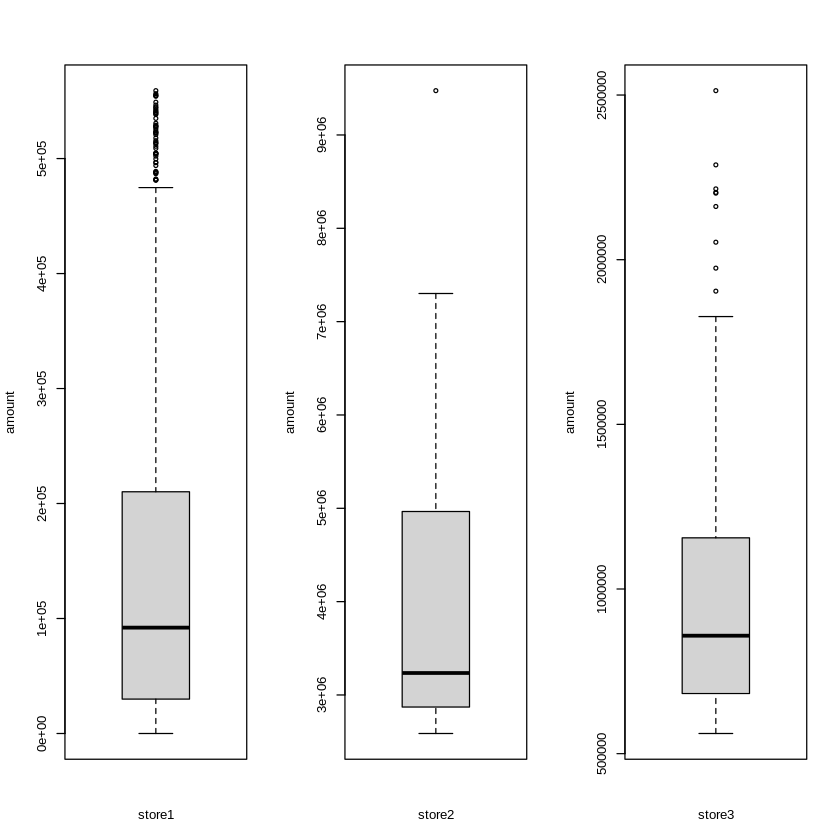

In [23]:
# amount

total_amount1 <- aggregate(amount~store_id,store1,sum)
total_amount2 <- aggregate(amount~store_id,store2,sum)
total_amount3 <- aggregate(amount~store_id, store3,sum)

par(mfrow=c(1,3))
boxplot(total_amount1$amount, xlab="store1", ylab="amount")
boxplot(total_amount2$amount, xlab="store2", ylab="amount")
boxplot(total_amount3$amount, xlab="store3", ylab="amount")

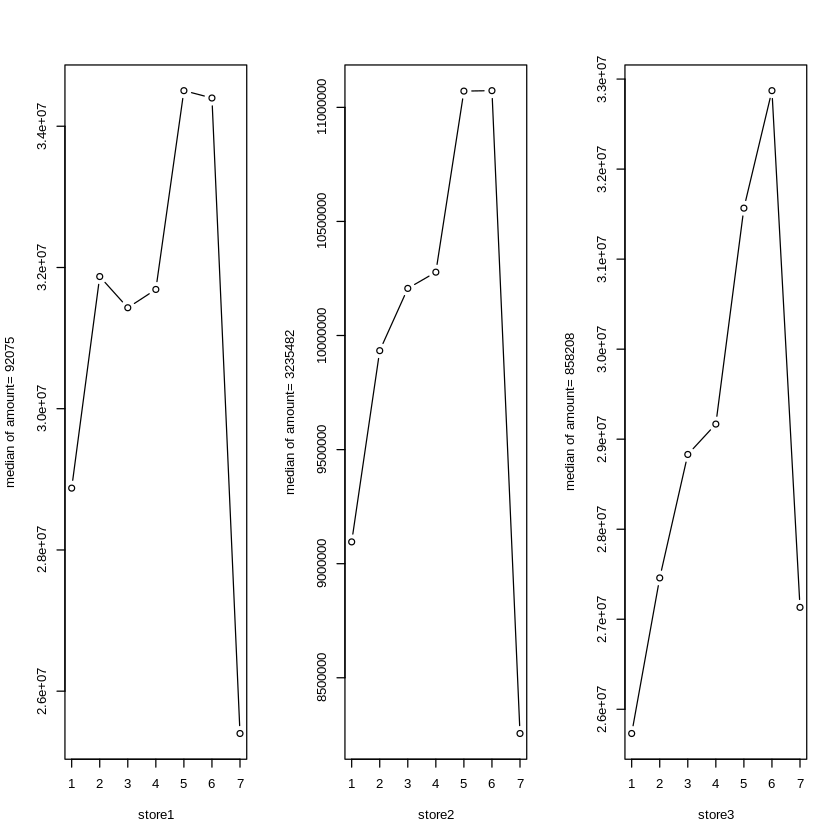

In [27]:
# 각 군집의 days_of_week별 분포 확인

par(mfrow=c(1,3))
plot((aggregate(amount~days_of_week, store1, sum))$amount, type='b',xlab="store1", ylab=paste0("median of amount= ",m_am1))
plot((aggregate(amount~days_of_week, store2, sum))$amount, type='b',xlab="store2", ylab=paste0("median of amount= ",m_am2))
plot((aggregate(amount~days_of_week, store3, sum))$amount, type='b',xlab="store3", ylab=paste0("median of amount= ",m_am3))

- 군집별 서로 상이한 패턴을 찾을 수 없음 </br>
- 모든 군집이 금요일과 토요일에 총 매출액이 가장 큰 것으로 보아 요일별 총 매출액을 가지고 군집 간 특징에 대해 구별할 수 없다는 것을 알 수 있음

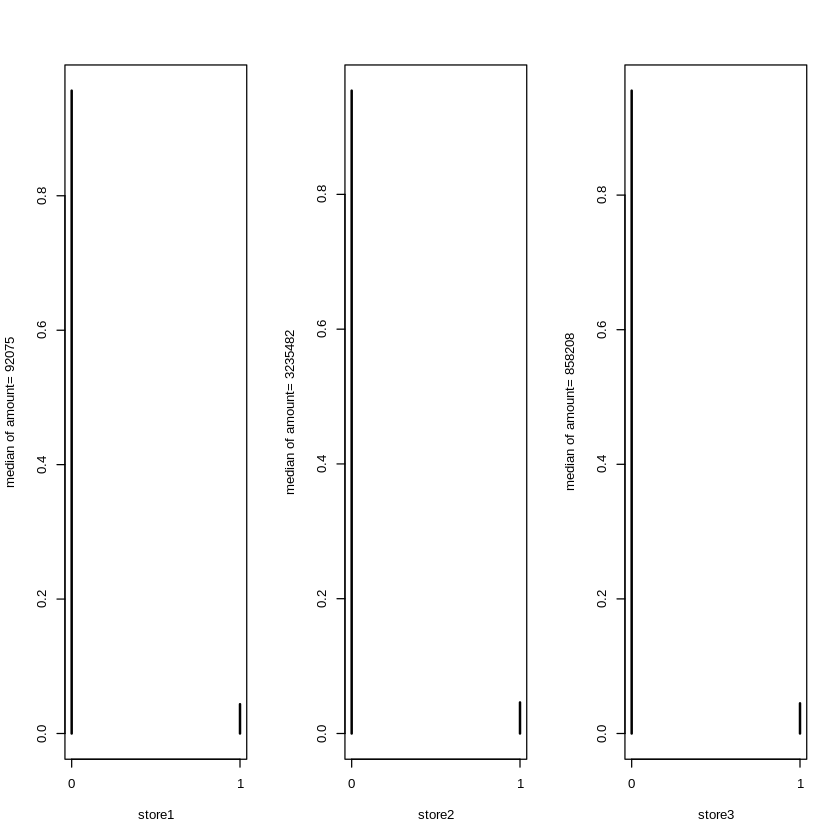

In [28]:
# 각 군집의 holyday별 분포 확인 (상대빈도)

t_holy1<-table(store1$holyday)
t_holy1 <- addmargins(t_holy1)
prop_holy1 <- t_holy1/t_holy1[3]
prop_holy1 <- prop_holy1[-3]

t_holy2 <-table(store2$holyday)
t_holy2 <- addmargins(t_holy2)
prop_holy2 <- t_holy2/t_holy2[3]
prop_holy2 <- prop_holy2[-3]

t_holy3 <-table(store3$holyday)
t_holy3 <- addmargins(t_holy3)
prop_holy3 <- t_holy3/t_holy3[3]
prop_holy3 <- prop_holy3[-3]

par(mfrow=c(1,3))
plot(prop_holy1, xlab = "store1", ylab=paste0("median of amount= ",m_am1))
plot(prop_holy2, xlab = "store2", ylab=paste0("median of amount= ",m_am2)) 
plot(prop_holy3, xlab = "store3", ylab=paste0("median of amount= ",m_am3))

시각화 결과 세 군집의 휴일 빈도수 차이는 없다고 나타남


**결론**

- 세 군집의 총 매출액 차이는 휴일과 요일이 아닌 할부 개월 수에 따라 달라짐
- 즉, 할부 개월 수에 따라 매출액이 증가하는 패턴이 보인 것 나타남
- 이에 따라 매출액이 가장 큰 집단은 큰 금액의 물품을 판매할 것이라고 예측할 수 있음

### 최다빈도 상점(ID = 0) vs 최대 매출액 상점(ID = 753) 비교

In [30]:
store_most_Freq <- df[df$store_id==store_comp_topf$store_id[1],]
store_most_Am <- df[df$store_id==store_comp_topa$store_id[1],]


    0     2     3     4     5 
68523    90   153     1     6 


    0     2     3     5    24 
39087    46   176     6     3 

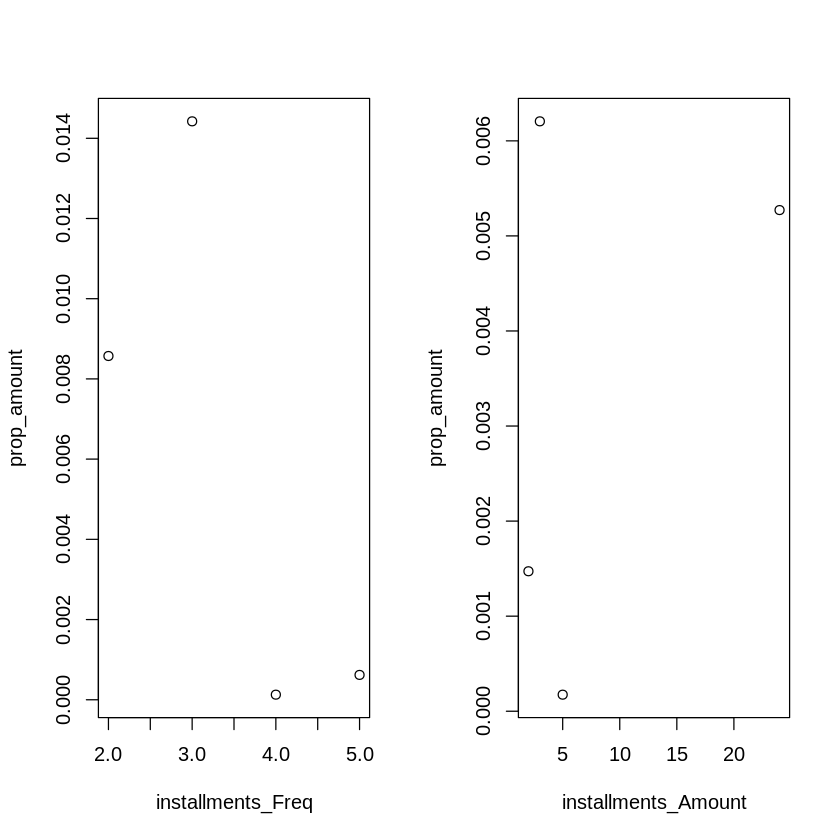

In [31]:
# 1. 할부개월별 비교 (일시불은 두 상점 모두 압도적으로 높기 때문에 분석에 방해되어 제거하고 비교)
table(store_most_Freq$installments)
table(store_most_Am$installments)
comp1 <- aggregate(amount~installments, store_most_Freq, sum)
comp2 <- aggregate(amount~installments, store_most_Am, sum)
par(mfrow=c(1,2))
plot(comp1$installments[-1],comp1$amount[-1]/sum(comp1$amount), xlab="installments_Freq", ylab="prop_amount")
plot(comp2$installments[-1],comp2$amount[-1]/sum(comp2$amount), xlab="installments_Amount", ylab="prop_amount")


**최다 빈도수 상점**: 할부 기간 짧음 </br>
**최대 매출 상점**: 비교적 할부 기간이 긴 경우가 상대적으로 많음

In [32]:
# 2. 요일별 비교
comp3 <- table(store_most_Freq$days_of_week)
comp4 <- table(store_most_Am$days_of_week)
addmargins(comp3)


    0     1     2     3     4     5     6   Sum 
 9469  9645  9777  9623  9718 10103 10438 68773 

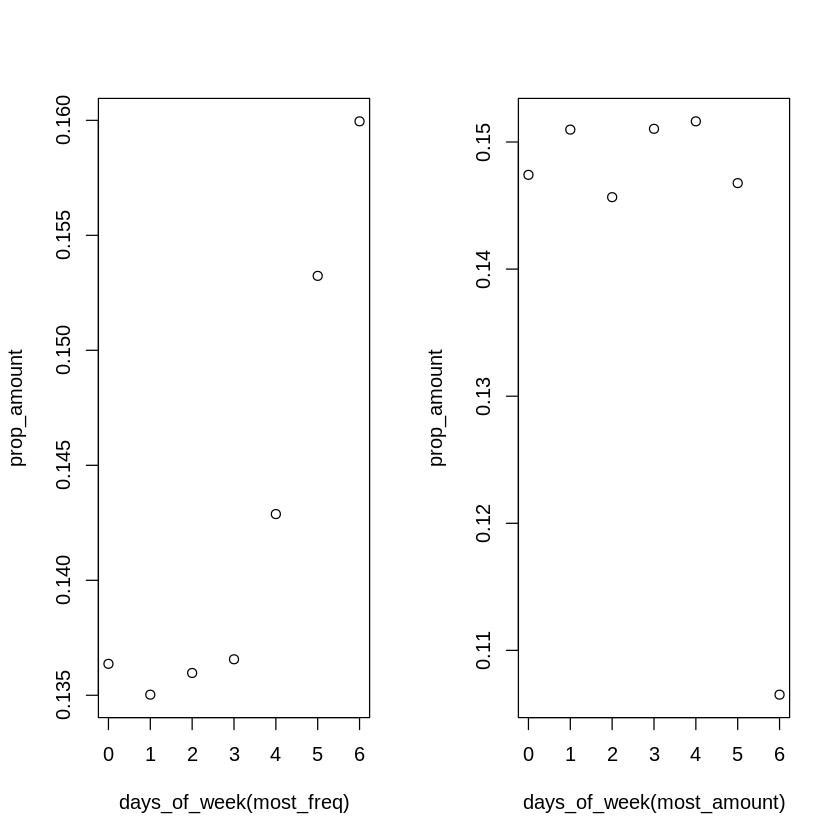

In [34]:
comp5 <- aggregate(amount~days_of_week, store_most_Freq, sum)
comp6 <- aggregate(amount~days_of_week, store_most_Am, sum)
par(mfrow=c(1,2))
plot(comp5$days_of_week, comp5$amount/sum(comp5$amount), xlab="days_of_week(most_freq)", ylab="prop_amount")
plot(comp6$days_of_week, comp6$amount/sum(comp6$amount), xlab="days_of_week(most_amount)", ylab="prop_amount")

**최다 빈도 상점:** 월요일에서 일요일로 갈 수록 총 매출액이 증가 </br>
**최대 매출액 상점:** 일요일의 총매출액이 눈에 띄게 작고, 나머지 요일은 비슷한 수준을 보임

In [35]:
# 3. holyday별 비교
table(store_most_Freq$holyday)/addmargins(table(store_most_Freq$holyday))[3]
table(store_most_Am$holyday)/addmargins(table(store_most_Am$holyday))[3]


         0          1 
0.94580722 0.05419278 


         0          1 
0.96342642 0.03657358 

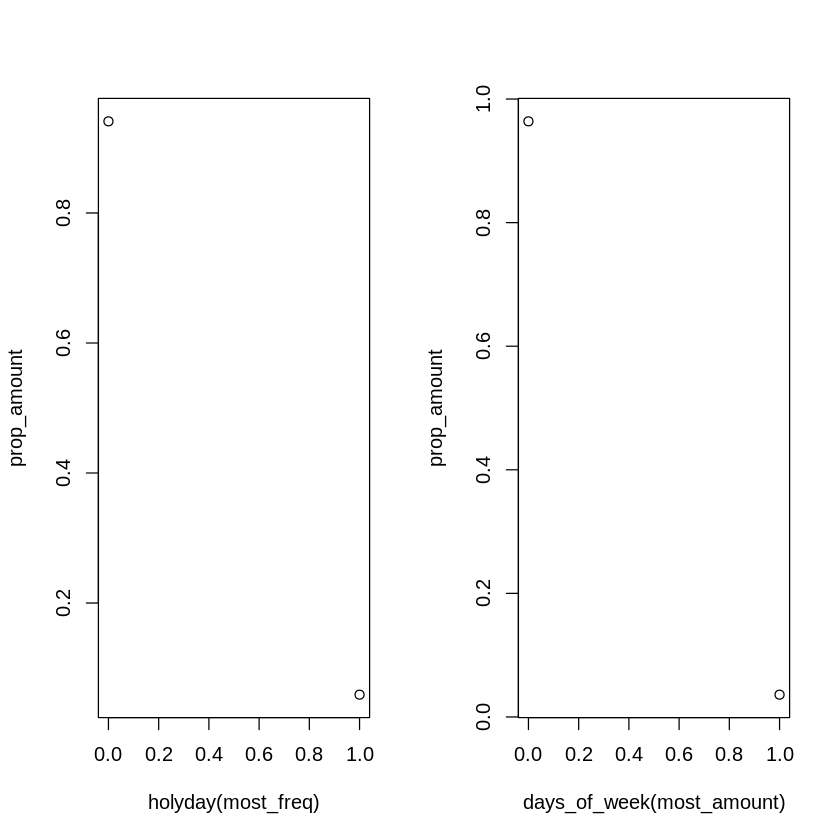

In [36]:
comp7 <- aggregate(amount~holyday, store_most_Freq, sum)
comp8 <- aggregate(amount~holyday, store_most_Am, sum)

par(mfrow=c(1,2))
plot(comp7$holyday, comp7$amount/sum(comp7$amount), xlab="holyday(most_freq)", ylab="prop_amount")
plot(comp8$holyday, comp8$amount/sum(comp8$amount), xlab="days_of_week(most_amount)", ylab="prop_amount")

비슷비슷함

In [37]:
# 취소 빈도 비교
cancel_freq <- nrow(store_most_Freq[store_most_Freq$amount<0,])
cancel_amount <- nrow(store_most_Freq[store_most_Am$amount<0,])
cancel <- c(Freq = cancel_freq, Amount = cancel_amount)
cancel

Freq Amount 
   613    195

In [ ]:
최대 빈도수 상점이 최대 매출액 상점보다 결제 취소 건수가 더 많음

**결론**
- 총 매출액은 일요일에서 토요일로 가면서 증가
-  전체 총 매출액이 커짐에 따라 할부 개월 수가 커지는 패턴이 있는데, 최다 빈도수 상점은 할부기간이 비교적 짧음
- 매출 건수 결제 금액도 최다 빈도수 상점에서 적게 나타남
- 총 매출액을 감소 시키는 카드 취소 역시 최다 빈도수 상점이 최대 매출액 상점보다 횟수가 3배 이상 크게 나타남